In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

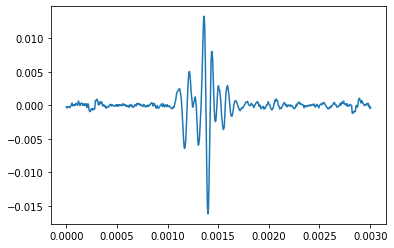

In [3]:
fs = 192e3
data = np.loadtxt('click.dat')
time = np.linspace(0, len(data)/fs, len(data))
plt.plot(time, data)

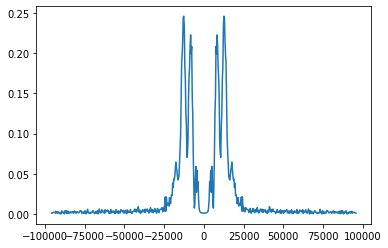

In [4]:
data_fft = np.fft.fft(data)
data_freq = np.fft.fftfreq(len(data), 1/fs)
plt.plot(np.fft.fftshift(data_freq), np.fft.fftshift(np.abs(data_fft)))

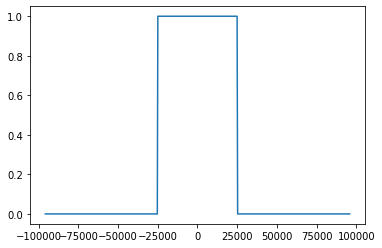

In [5]:
filt = np.ones(len(data))
filt_cutoff = 25e3
filt[np.abs(data_freq) > filt_cutoff] = 0
plt.plot(np.fft.fftshift(data_freq), np.fft.fftshift(filt))

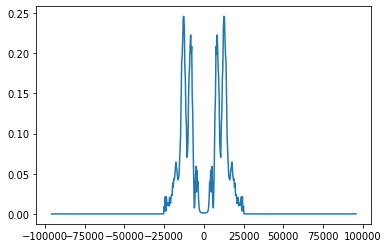

In [6]:
data_fft_filt = data_fft * filt
plt.plot(np.fft.fftshift(data_freq), np.fft.fftshift(np.abs(data_fft_filt)))

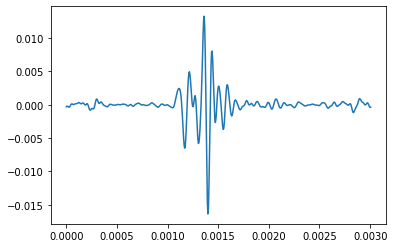

In [7]:
data_clean = np.real(np.fft.ifft(data_fft_filt))
plt.plot(time, data_clean)

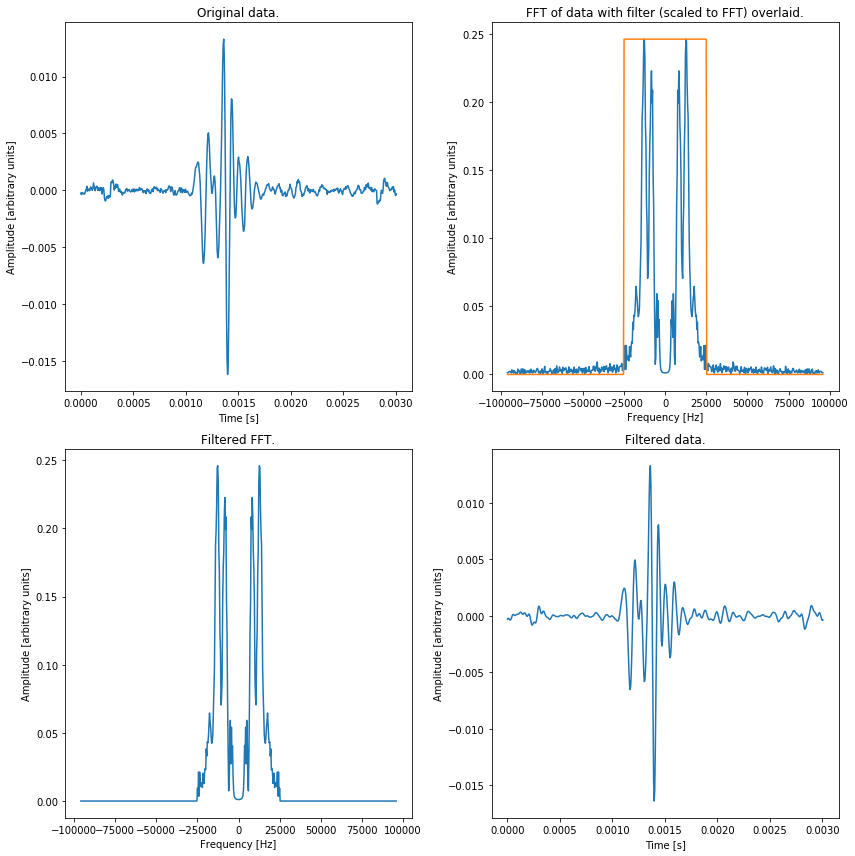

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].plot(time, data)
ax[0][0].set_title('Original data.')
ax[0][0].set_xlabel('Time [s]')
ax[0][0].set_ylabel('Amplitude [arbitrary units]')

ax[0][1].plot(np.fft.fftshift(data_freq), np.fft.fftshift(np.abs(data_fft)))
ax[0][1].plot(np.fft.fftshift(data_freq),
              np.fft.fftshift(filt) * np.max(np.abs(data_fft)))
ax[0][1].set_title('FFT of data with filter (scaled to FFT) overlaid.')
ax[0][1].set_xlabel('Frequency [Hz]')
ax[0][1].set_ylabel('Amplitude [arbitrary units]')

ax[1][0].plot(np.fft.fftshift(data_freq),
              np.fft.fftshift(np.abs(data_fft_filt)))
ax[1][0].set_title('Filtered FFT.')
ax[1][0].set_xlabel('Frequency [Hz]')
ax[1][0].set_ylabel('Amplitude [arbitrary units]')

ax[1][1].plot(time, data_clean)
ax[1][1].set_title('Filtered data.')
ax[1][1].set_xlabel('Time [s]')
ax[1][1].set_ylabel('Amplitude [arbitrary units]')

fig.tight_layout()